In [1]:
# Importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
# Reading dataset
data = pd.read_csv("/content/Mall_Customers.csv")

In [3]:
# First five rows
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# General information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# Getting statistical info about dataset
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
# Null values
data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [7]:
# Unique values in dataset
data.nunique()

,0
CustomerID,200
Gender,2
Age,51
Annual Income (k$),64
Spending Score (1-100),84


Customer id has 200/200 unique values. This feature would not be an important feature to cluster the data. Removing CustomerID column.

In [8]:
data = data.drop("CustomerID", axis=1)

Annual income and Spending score are important features in clusting customer of a retail place. Have to check how important is Gender and Age.

Checking how important is Gender

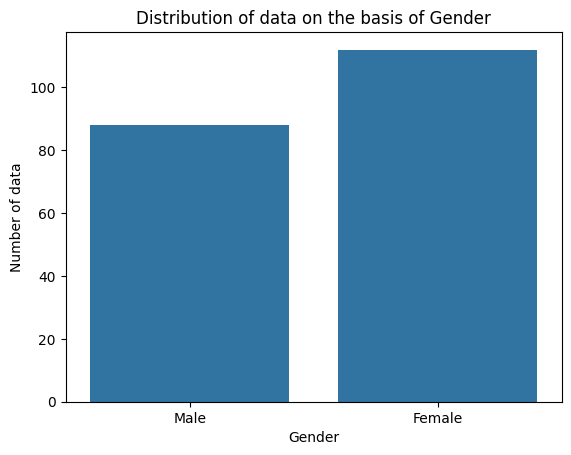

In [9]:
# Plotting to see data distribution based on Gender
sns.countplot(x = data["Gender"])
plt.title("Distribution of data on the basis of Gender")
plt.xlabel("Gender")
plt.ylabel("Number of data")
plt.show()

Distribution of data based on Gender seems almost equal.

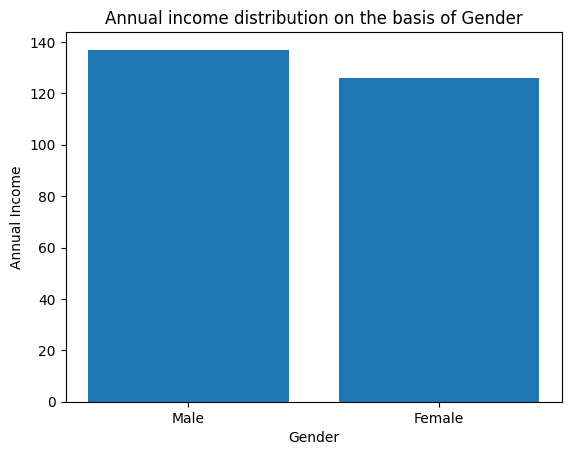

In [10]:
# Plotting to see which gender has more annual income
plt.bar(data["Gender"], data["Annual Income (k$)"])
plt.title("Annual income distribution on the basis of Gender")
plt.xlabel("Gender")
plt.ylabel("Annual Income")
plt.show()

Annual income distribution seems almost equal.

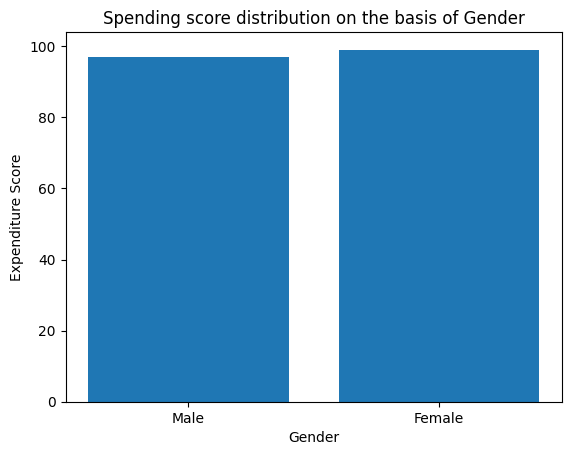

In [11]:
# Plotting to see which gender has spent more
plt.bar(data["Gender"], data["Spending Score (1-100)"])
plt.title("Spending score distribution on the basis of Gender")
plt.xlabel("Gender")
plt.ylabel("Expenditure Score")
plt.show()

Expenditure score is also almost equal.

Can remove Gender.

Checking for Age column.

Text(0.5, 0, 'Age')

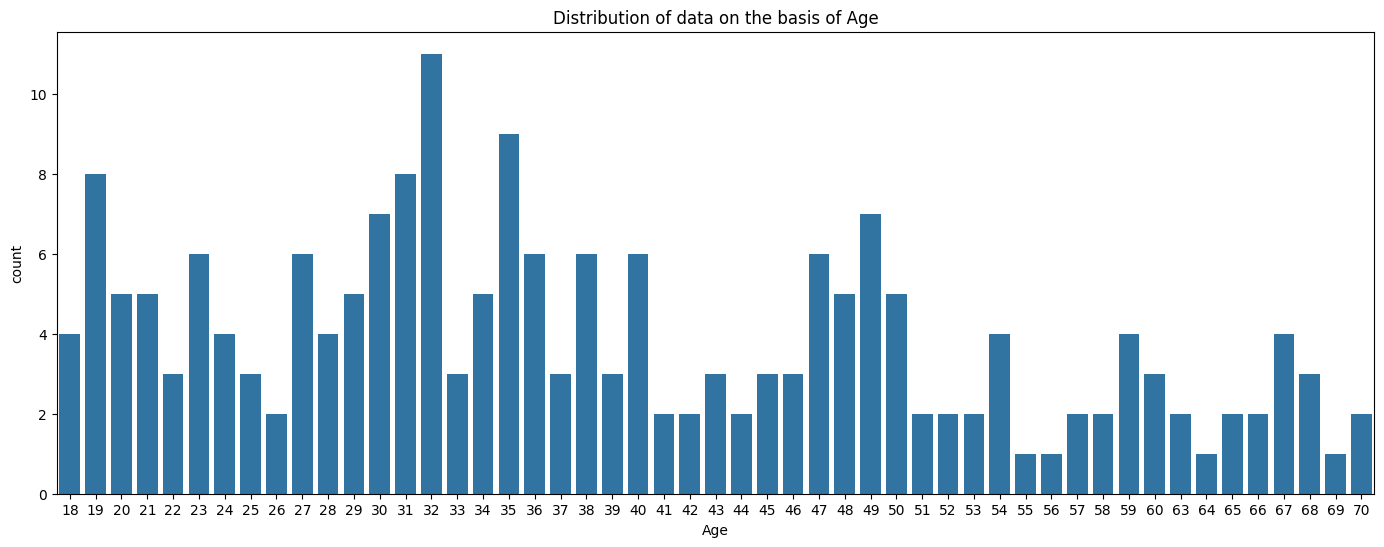

In [12]:
# Plotting to see distribution of data on the basis of age
plt.figure(figsize=(17, 6))
sns.countplot(x = data["Age"])
plt.title("Distribution of data on the basis of Age")
plt.xlabel("Age")

Not all age has equal amount of data.

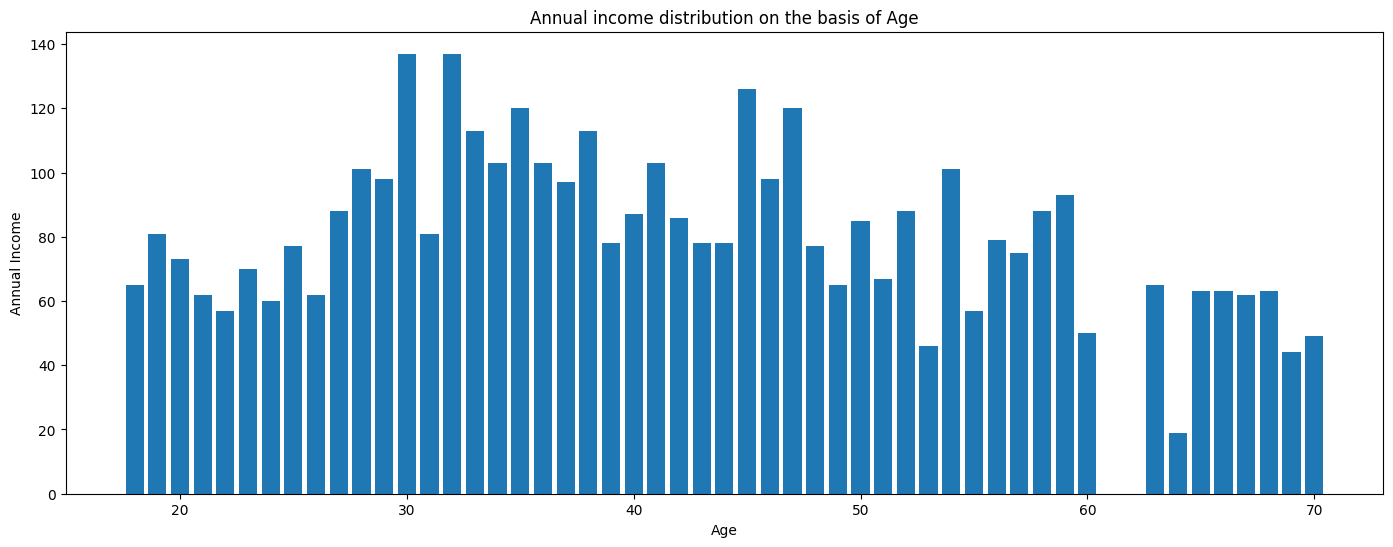

In [13]:
# Plotting to see which gender has more annual income
plt.figure(figsize=(17, 6))
plt.bar(data["Age"], data["Annual Income (k$)"])
plt.title("Annual income distribution on the basis of Age")
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.show()

Unequally distributed data.

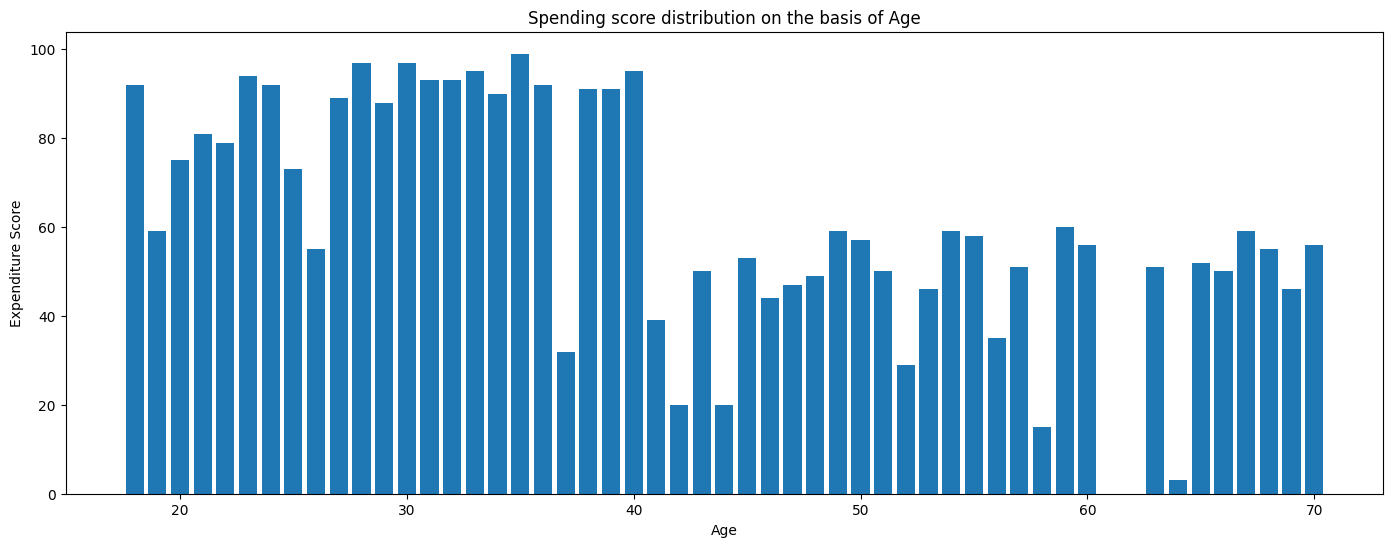

In [14]:
# Plotting to see which gender has spent more
plt.figure(figsize=(17, 6))
plt.bar(data["Age"], data["Spending Score (1-100)"])
plt.title("Spending score distribution on the basis of Age")
plt.xlabel("Age")
plt.ylabel("Expenditure Score")
plt.show()

Unequally distributed data

From these plots we can conclude that Gender and Age can be removed. Gender has too equal distribution of everything so k-means might not get distinctive features. Age has extremely unequal distribution and may hamper clustering properly.

Removeing CustomerID, Gender, age column

In [15]:
# Removing Gender and Age column
data = data.drop(["Gender", "Age"], axis=1)

In [16]:
# Checking dataset after feature reduction
data

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


Applying K-Means algorith for clustering.

In [17]:
# Creating an empty list for storing the wcss values
wcss = []

# innitializing K-Means algorithm and using for loop to find the best number of clusters
for i in range(1, 16):
  k_means = KMeans(n_clusters=i, init="k-means++", random_state=0)
  k_means.fit(data)
  wcss.append(k_means.inertia_)

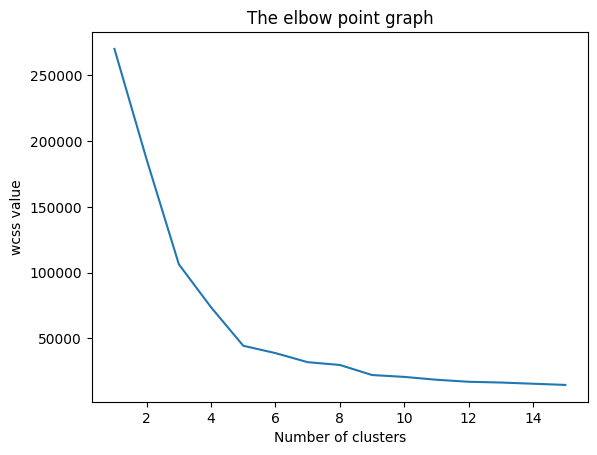

In [18]:
# Plotting graph to see the best wcss value
plt.plot(range(1, 16), wcss)
plt.title("The elbow point graph")
plt.xlabel("Number of clusters")
plt.ylabel("wcss value")
plt.show()

Optimum number of clusters seems 5

In [19]:
# Traing the k-means clustering model
k_means = KMeans(n_clusters=5, init="k-means++", random_state=0)

# Returning a label for each data point based on their cluster
y = k_means.fit_predict(data)

In [20]:
# Checking our labels
y

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

Plotting customer groups

Text(0, 0.5, 'Spending Score (1-100)')

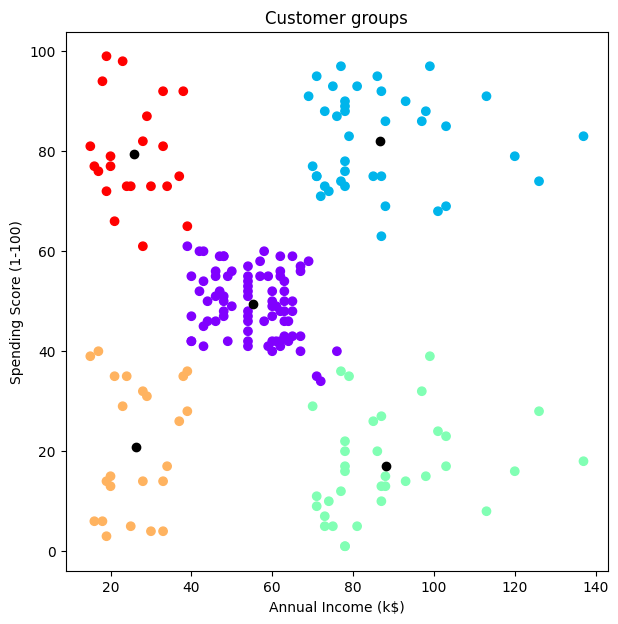

In [21]:
plt.figure(figsize=(7, 7))

# Plotting the clusters and their centroids
plt.scatter(data["Annual Income (k$)"], data["Spending Score (1-100)"], c=k_means.labels_, cmap="rainbow")

# Plotting the centroids
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], color="black")


plt.title("Customer groups")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
